In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [12]:
path = '/ihme/homes/beatrixh/vivarium_research_lsff/data_prep/outputs/lsff_estimated_data_plus_covariates_with_nutrient_3_22_2021.csv'
locs = pd.read_csv(path).location_name.unique()

In [13]:
locs = list(locs)

In [2]:
path = '/ihme/homes/beatrixh/repos/scratch/ccAllDataRowBase (1).csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Country,Year,Food Vehicle,Indicator,Nutrient,Compound,Indicator Value,Unit,Income Status,Region,Source
0,Afghanistan,NaN,Wheat flour,Voluntary fortification,NaN,Unspecified,No,NaN,Low income,Asia,NaN
1,Afghanistan,NaN,Wheat flour,Legislation scope types,NaN,Unspecified,All,NaN,Low income,Asia,Islamic Republic of Afghanistan Ministry of Pu...
2,Afghanistan,NaN,Wheat flour,Legislation scope origins - Domestically produced,NaN,Unspecified,Domestically produced,NaN,Low income,Asia,Islamic Republic of Afghanistan Ministry of Pu...
3,Afghanistan,NaN,Wheat flour,Legislation scope origins - Imports,NaN,Unspecified,Imports,NaN,Low income,Asia,Islamic Republic of Afghanistan Ministry of Pu...
4,Afghanistan,NaN,Wheat flour,Legislation scope uses - Household,NaN,Unspecified,Household,NaN,Low income,Asia,Islamic Republic of Afghanistan Ministry of Pu...


In [4]:
df = df.rename(columns={i:i.replace(" ","_").lower() for i in df.columns})

In [10]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea

In [14]:
df[(df.country.isin(locs)) &( df.indicator=="Compliance in percentage")]

,country,year,food_vehicle,indicator,nutrient,compound,indicator_value,unit,income_status,region,source
1123,Angola,2017.0,Wheat flour,Compliance in percentage,NaN,Unspecified,0.000,%,Lower middle income,Africa,Daniel Ribant. Personal communication. Angola....
1133,Angola,2018.0,Rice,Compliance in percentage,NaN,Unspecified,0.000,%,Lower middle income,Africa,"Scott Montgomery, Food Fortification Initiativ..."
1135,Angola,2018.0,Maize flour,Compliance in percentage,NaN,Unspecified,0.000,%,Lower middle income,Africa,"Scott Montgomery, Food Fortification Initiativ..."
3500,Bangladesh,2006.0,Salt,Compliance in percentage,NaN,Unspecified,78.600,%,Lower middle income,Asia,Nutrition International. Bangladesh Salt Iodiz...
3515,Bangladesh,2007.0,Salt,Compliance in percentage,NaN,Unspecified,95.500,%,Lower middle income,Asia,Nutrition International. Bangladesh Salt Iodiz...
...,...,...,...,...,...,...,...,...,...,...,...
48901,Uganda,2018.0,Salt,Compliance in percentage,NaN,Unspecified,78.600,%,Low income,Africa,"Mariam Nalwoga, Uganda National Bureau of Stan..."
48903,Uganda,2019.0,Maize flour,Compliance in percentage,NaN,Unspecified,3.000,%,Low income,Africa,"Food Fortification Initiative, Global Alliance..."
51975,Viet Nam,2017.0,Wheat flour,Compliance in percentage,NaN,Unspecified,0.000,%,Lower middle income,Asia,"Becky Tsang, Food Fortification Initiative. Pe..."
51980,Viet Nam,2017.0,Rice,Compliance in percentage,NaN,Unspecified,0.000,%,Lower middle income,Asia,"Karen Codling, Food Fortification Initiative. ..."


In [5]:
bf = df[(df.country=="Burkina Faso") & (df.food_vehicle=="Oil")]

In [6]:
bf.indicator.unique()

array(['Voluntary fortification', 'Legislation scope types',
       'Legislation scope origins - Domestically produced',
       'Legislation scope origins - Imports',
       'Legislation scope uses - Household',
       'Legislation scope uses - Processed food',
       'Legislation scope uses - Animal feed',
       'Export monitoring protocol', 'Import monitoring protocol',
       'Country standard includes WHO recommended fortification compound',
       'Who recommendation of compound',
       'The nutrient level of other food',
       'Overall fortification opportunity', 'Intake level category',
       'Potential nutrient intake before accounting for fortification compliance or quality',
       'Percentage of estimate average requirement before accounting for fortification compliance or quality',
       'Percentage of upper limit before accounting for fortification compliance or quality',
       'Food intake/availability (g/c/d)', 'Total food available (MT)',
       'Fortification sta

In [8]:
bf[(bf.indicator=="Compliance in percentage")]

,country,year,food_vehicle,indicator,nutrient,compound,indicator_value,unit,income_status,region,source
7108,Burkina Faso,2017.0,Oil,Compliance in percentage,NaN,Unspecified,39.000,%,Low income,Africa,Global Alliance for Improved Nutrition. Market...


In [7]:
bf_intake = bf[bf.indicator=="Food intake/availability (g/c/d)"]
bf_intake.indicator_value = bf_intake.indicator_value.astype(float)

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


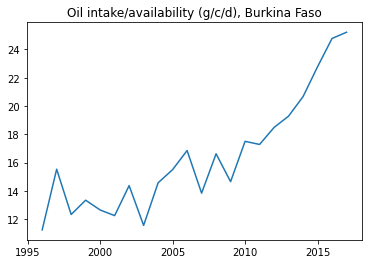

In [8]:
vehicle = "Oil"
y = bf_intake.indicator_value
x = bf_intake.year


plt.title(f"{vehicle} intake/availability (g/c/d), Burkina Faso")
plt.plot(x,y)
plt.show()

In [9]:
bf.head()

,country,year,food_vehicle,indicator,nutrient,compound,indicator_value,unit,income_status,region,source
6838,Burkina Faso,NaN,Oil,Voluntary fortification,NaN,Unspecified,No,NaN,Low income,Africa,NaN
6839,Burkina Faso,NaN,Oil,Legislation scope types,NaN,Unspecified,Subset,NaN,Low income,Africa,No Author. Interministerial Order No. 2012-023...
6840,Burkina Faso,NaN,Oil,Legislation scope origins - Domestically produced,NaN,Unspecified,Domestically produced,NaN,Low income,Africa,No Author. Interministerial Order No. 2012-023...
6841,Burkina Faso,NaN,Oil,Legislation scope origins - Imports,NaN,Unspecified,Imports,NaN,Low income,Africa,No Author. Interministerial Order No. 2012-023...
6842,Burkina Faso,NaN,Oil,Legislation scope uses - Household,NaN,Unspecified,Household,NaN,Low income,Africa,No Author. Interministerial Order No. 2012-023...


In [10]:
my = df[(df.country=="Myanmar")]

In [12]:
my_wheat = my[my.food_vehicle=="Wheat flour"]

In [15]:
my_wheat.indicator.unique()

array(['Mandatory fortification', 'Fortification standard',
       'Voluntary fortification', 'Export monitoring protocol',
       'Import monitoring protocol', 'Overall fortification opportunity',
       'Intake level category', 'Food intake/availability (g/c/d)',
       'Total food available (MT)', 'Compliance in metric ton',
       'Compliance in percentage', 'Industrially processed in percentage',
       'Industrially processed in metric ton'], dtype=object)

In [20]:
my_wheat[(my_wheat.indicator=="Compliance in percentage")]

,country,year,food_vehicle,indicator,nutrient,compound,indicator_value,unit,income_status,region,source
33039,Myanmar,2017.0,Wheat flour,Compliance in percentage,NaN,Unspecified,0.000,%,Lower middle income,Asia,"Becky Tsang, Food Fortification Initiative. Pe..."


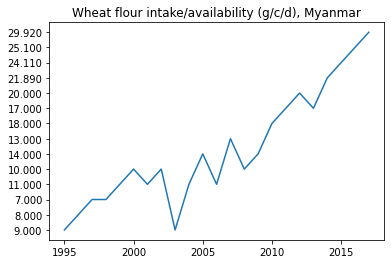

In [25]:
x = my_wheat[(my_wheat.indicator=="Food intake/availability (g/c/d)")].year
y = my_wheat[(my_wheat.indicator=="Food intake/availability (g/c/d)")].indicator_value
vehicle="Wheat flour"


plt.title(f"{vehicle} intake/availability (g/c/d), Myanmar")
plt.plot(x,y)
plt.show()